<a href="https://colab.research.google.com/github/Adrian-Dupuis/Adrian-Dupuis/blob/main/DL_COLAB_3_CNNs_SOLUTION_ORIGINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Learn about PyTorch DataLoaders and how to build your own on a custom dataset.

b) Learn how to train and evaluate a convolutional neural network.



#**Q1 DataLoaders**

#Connect your drive account

In order to __upload the numpy files of the given folder__, you can use the `drive` package from `google.colab` library like this:

```Python
from google.colab import drive
```

Then, you __define the destination of your Drive account__ like this:

```Python
drive = drive.mount('/content/drive')
```

Finally, you can __load files from the given folder__ in this way:

```Python
arr_train_labels = np.load('drive/.._folderdestination_../train_labels.npy')
```

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

drive = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load train, test and validation label arrays
# here put your custom destination folder

# *****START CODE

train_images = np.load('drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/train_images.npy')
val_images = np.load('drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/val_images.npy')

train_labels = np.load('drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/train_labels.npy')
val_labels = np.load('drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/val_labels.npy')

# *****END CODE

In [ ]:
print('train images', train_images.shape)
print('val images', val_images.shape)
print('train labels', train_labels.shape)
print('val labels', val_labels.shape)

train images (5000, 1, 28, 28)
val images (1000, 1, 28, 28)
train labels (5000,)
val labels (1000,)


In [ ]:
print(train_images[0])

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  22
    47  72  89  47  47 164 230 176   0   0   0]
  [  0   0   0   0   0   0   0  13  99 116  57  

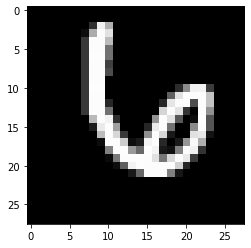

In [ ]:
from matplotlib import pyplot as plt

##print a random image
# *****START CODE
plt.imshow(train_images[124][0], cmap='gray')
plt.show()
# *****END CODE

In [ ]:
##print the corresponding label
# *****START CODE
print(train_labels[124])
# *****END CODE

6


Iterate through the training images using a for loop and a batchsize of 10

In [ ]:
batchsize = 10
# *****START CODE
for i in range(0, len(train_images), batchsize):
    img_batch = train_images[i:i+batchsize]
    lbl_batch = train_labels[i:i+batchsize]
    print(i)
    print('img_batch', img_batch.shape)
    print('lbl_batch', lbl_batch.shape)
# *****END CODE    

0
img_batch (10, 1, 28, 28)
lbl_batch (10,)
10
img_batch (10, 1, 28, 28)
lbl_batch (10,)
20
img_batch (10, 1, 28, 28)
lbl_batch (10,)
30
img_batch (10, 1, 28, 28)
lbl_batch (10,)
40
img_batch (10, 1, 28, 28)
lbl_batch (10,)
50
img_batch (10, 1, 28, 28)
lbl_batch (10,)
60
img_batch (10, 1, 28, 28)
lbl_batch (10,)
70
img_batch (10, 1, 28, 28)
lbl_batch (10,)
80
img_batch (10, 1, 28, 28)
lbl_batch (10,)
90
img_batch (10, 1, 28, 28)
lbl_batch (10,)
100
img_batch (10, 1, 28, 28)
lbl_batch (10,)
110
img_batch (10, 1, 28, 28)
lbl_batch (10,)
120
img_batch (10, 1, 28, 28)
lbl_batch (10,)
130
img_batch (10, 1, 28, 28)
lbl_batch (10,)
140
img_batch (10, 1, 28, 28)
lbl_batch (10,)
150
img_batch (10, 1, 28, 28)
lbl_batch (10,)
160
img_batch (10, 1, 28, 28)
lbl_batch (10,)
170
img_batch (10, 1, 28, 28)
lbl_batch (10,)
180
img_batch (10, 1, 28, 28)
lbl_batch (10,)
190
img_batch (10, 1, 28, 28)
lbl_batch (10,)
200
img_batch (10, 1, 28, 28)
lbl_batch (10,)
210
img_batch (10, 1, 28, 28)
lbl_batch (10,)

#Example: PyTorch DataLoader for MNIST dataset

In [ ]:
import torch
from torchvision import datasets, transforms 

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset2, batch_size=32, shuffle=False)

In [ ]:
for batch_idx, batch in enumerate(train_loader):
        data, target = batch
        #print('data', data.shape)
        print('target', target.shape)

target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Size([32])
target torch.Siz

#Familiarize with .csv files

Create a csv file for the following table:

| Name         | Surname        | Gender | 
| ------------ | ------------ | ------- | 
| Mary         | Smith        | Female       |
| James        | Williams     | Male     | 
| Sarah        | Martin       | Female      | 
| Peter        | Miller       | Male     | 

In [ ]:
import pandas as pd

names = ['Mary', 'James', 'Sarah', 'Peter']
surnames = ['Smith', 'Williams', 'Martin', 'Miller']
genders = ['Female', 'Male', 'Female', 'Male']

df = pd.DataFrame({'Name': names ,
                       'Surname': surnames ,
                       'Gender': genders ,
                      })

# *****START CODE
df.to_csv('drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/toy.csv', 
          index=False, columns = ['Name', 'Surname', 'Gender'])
# *****END CODE

In [ ]:
toy_file = pd.read_csv('drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/toy.csv')

In [ ]:
##show first column
toy_file.iloc[:,0]

0     Mary
1    James
2    Sarah
3    Peter
Name: Name, dtype: object

In [ ]:
##show second row
toy_file.iloc[1,:]    

Name          James
Surname    Williams
Gender         Male
Name: 1, dtype: object

In [ ]:
##show element in first row and second column
toy_file.iloc[0,1]

'Smith'

#Create your own custom DataLoader

Use the numpy files to define your own custom dataloader.

a) First create and save a .csv file with 2 columns:

- ‘image_ID’, which involves the image index locations
- ‘labels’, which involves the corresponding label for every image index

In [ ]:
## write a function that saves the array from create_list in .csv format (fill the blanks)
def save_csv(indexes, labels, destination):
    # *****START CODE
    df = pd.DataFrame({'image_ID': indexes,
                       'label': labels,
                      })
    # *****END CODE
    df.to_csv(destination, index=False, columns=["image_ID", "label"])

In [ ]:
train_indexes = list(np.arange(0,5000))
train_labels = list(train_labels)
save_csv(train_indexes, train_labels, 'drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/train.csv')

In [ ]:
val_indexes = list(np.arange(0,1000))
val_labels = list(val_labels)
save_csv(val_indexes, val_labels, 'drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/val.csv')

In [ ]:
file = pd.read_csv('drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/val.csv')
print(file)

     image_ID  label
0           0      2
1           1      8
2           2      1
3           3      2
4           4      4
..        ...    ...
995       995      5
996       996      6
997       997      9
998       998      4
999       999      3

[1000 rows x 2 columns]


b) Now create your own custom dataloader. When building a custom dataloader, it is necessary to define a class which involves 3 required functions:

- __init__, for the class initialization

- __getitem__, for data extraction according to given indexes

-  __len__, for calculating the total number of data samples

In [ ]:
from torch.utils.data.dataset import Dataset

class MyDataset(Dataset):
    def __init__(self, csv_path, images_file):
        ## Read the csv file with pandas library
        # *****START CODE
        self.data_info = pd.read_csv(csv_path)
        # *****END CODE
        ##Load the numpy array of images
        self.images = np.load(images_file)

    def __getitem__(self, index):
        ## Get the image-label set using the given index
        ## Hint: use iloc command from pandas library
        # *****START CODE
        image_id = (self.data_info.iloc[index,0])
        image = self.images[image_id]

        label = int(self.data_info.iloc[index,1])
        # *****END CODE
        ## bring all image spectral values to the range of [0,1]
        image = image/255.0

        return image, label

    def __len__(self):
        ## return the total number of data samples
        return len(self.data_info)

c) Call the dataloader for both the training and the validation sets

In [ ]:
from torch.utils.data import DataLoader

# training and validation .csv paths
# here put your custom destination folder
train_csv_file = 'drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/train.csv'
val_csv_file = 'drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/val.csv'

# paths for training and validation numpy array images
# here put your custom destination folder
train_images_file = 'drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/train_images.npy'
val_images_file = 'drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/val_images.npy'

# define and create training and validation dataloaders using MyDataset (fill the blanks)
# *****START CODE
# define and create training and validation dataloaders using MyDataset (fill the blanks)
train_dataset = MyDataset(train_csv_file, train_images_file)
val_dataset = MyDataset(val_csv_file, val_images_file)

train_dataloader = DataLoader( train_dataset, batch_size=32, shuffle=True )
val_dataloader = DataLoader( val_dataset, batch_size=32, shuffle=False )
# *****END CODE

Iterate through your dataloader using a for loop.

In [ ]:
from tqdm import tqdm
for i, batch, in enumerate(tqdm(train_dataloader)):
      img_batch, labels = batch
      print('img', img_batch.shape)
      print('labels', labels.shape)

  0%|          | 0/157 [00:00<?, ?it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels

 24%|██▍       | 38/157 [00:00<00:00, 188.26it/s]

 torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28]

 48%|████▊     | 76/157 [00:00<00:00, 182.73it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Siz

 61%|██████    | 95/157 [00:00<00:00, 172.58it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Siz

 72%|███████▏  | 113/157 [00:00<00:00, 166.32it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])


 83%|████████▎ | 130/157 [00:00<00:00, 156.98it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Siz

100%|██████████| 157/157 [00:00<00:00, 164.71it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([8, 1, 28, 28])
labels torch.Size([8])


#**Q2 Classification problem**

Define your custom convolutional neural network.

In [ ]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, 32, 3, 1) #W2=(W1−F+2P)/S+1
        ##define a second convolutional layer, which outputs 64 channels
        # *****START CODE
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        # *****END CODE
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        ##create the last two fully connected layers
        # *****START CODE
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, out_ch)
        # *****END CODE

# define the forward propagation of the data
# conv1--relu--conv2--maxpool--dropout1--fc1--dropout2--fc2
    def forward(self, x):
        # *****START CODE
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2) #W2=(W1−F)/S+1
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = x  #F.log_softmax(x, dim=1)
         # *****END CODE       
        return output

In [ ]:
# define model
# *****START CODE
model = ConvNet(1,10)
# *****END CODE

In [ ]:
import torch
# define optimizer, criterion and number of training epochs
# *****START CODE
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
epochs = 10
# *****END CODE

In [ ]:
!pip install torchnet
import torchnet as tnt

# define confusion matrix using tnt package
confusion_matrix = tnt.meter.ConfusionMeter(10)

In [ ]:
# create a directory for saving the models and the training progress
save_folder = 'drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/models'

In [ ]:
##function which saves the overall accuracy and average loss at the end of each epoch,
##both for the training and the validation set
def write_results(save_folder, epoch, train_acc, val_acc, train_loss, val_loss):
    ff=open('{}/progress.txt'.format(save_folder),'a')
    ff.write(' E: ')
    ff.write(str(epoch))
    ff.write('         ')
    ff.write(' TRAIN_OA: ')
    ff.write(str('%.3f' % train_acc))
    ff.write(' VAL_OA: ')
    ff.write(str('%.3f' % val_acc))
    ff.write('         ')
    ff.write(' TRAIN_LOSS: ')
    ff.write(str('%.3f' % train_loss))
    ff.write(' VAL_LOSS: ')
    ff.write(str('%.3f' % val_loss))
    ff.write('\n')

In [ ]:
import matplotlib.pyplot as plt
#function that creates the train-val loss graph
#variables 'train_loss' and 'val_loss' are losts containing the average losses for all the epochs
def save_graph(train_loss, val_loss, nb_epochs, save_folder):
    plt.plot(list(range(nb_epochs+1))[1:], train_loss)
    plt.plot(list(range(nb_epochs+1))[1:], val_loss)
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('{}/chart.png'.format(save_folder))

  0%|          | 0/157 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
  2%|▏         | 3/157 [00:00<00:13, 11.51it/s]

Train (epoch 1/10) [0/157 (0%)]	Loss: 2.301065


 66%|██████▌   | 103/157 [00:08<00:04, 13.19it/s]

Train (epoch 1/10) [100/157 (64%)]	Loss: 2.196656


100%|██████████| 32/32 [00:00<00:00, 32.03it/s]


Confusion Matrix:
[[ 92   1   0   0   0   0   1   0   0   6]
 [  0 111   1   0   0   0   0   0   0   1]
 [ 13  16  49   7   1   0   4   0   0  14]
 [  1   9   0  59   0   0   1   0   0  20]
 [  1   2   0   0  45   0   0   0   0  45]
 [  9  18   0  33   1   0   1   0   0  36]
 [  8  14   0   0   7   0  89   0   0   2]
 [  1  11   0   0   1   0   0  25   0  61]
 [  6  23   0  23   0   0   0   0   0  52]
 [  1   3   0   0   0   0   0   0   0  75]]
TRAIN_LOSS:  2.223 TRAIN_ACC:  31.680
VAL_LOSS:  2.042 VAL_ACC:  54.500


  1%|▏         | 2/157 [00:00<00:11, 13.13it/s]

Train (epoch 2/10) [0/157 (0%)]	Loss: 1.969260


 65%|██████▍   | 102/157 [00:07<00:04, 13.33it/s]

Train (epoch 2/10) [100/157 (64%)]	Loss: 1.042189


100%|██████████| 32/32 [00:00<00:00, 34.80it/s]


Confusion Matrix:
[[ 93   0   0   2   0   0   2   1   2   0]
 [  0 109   1   1   0   0   0   0   1   1]
 [  4   0  79   9   0   0   8   2   0   2]
 [  1   4   1  74   0   2   2   4   0   2]
 [  1   0   0   0  78   0   3   0   0  11]
 [  3   7   1  12   5  59   2   2   4   3]
 [  3   3   0   0   3   0 110   0   1   0]
 [  1   3   0   0   0   0   0  92   0   3]
 [  2   6   0  21   1   2   0   5  64   3]
 [  0   1   0   2   2   0   0   7   0  67]]
TRAIN_LOSS:  1.337 TRAIN_ACC:  65.260
VAL_LOSS:  0.596 VAL_ACC:  82.500


  1%|▏         | 2/157 [00:00<00:11, 12.98it/s]

Train (epoch 3/10) [0/157 (0%)]	Loss: 0.962386


 65%|██████▍   | 102/157 [00:07<00:04, 12.94it/s]

Train (epoch 3/10) [100/157 (64%)]	Loss: 0.679867


100%|██████████| 32/32 [00:00<00:00, 34.88it/s]


Confusion Matrix:
[[ 97   0   0   2   0   0   1   0   0   0]
 [  0 107   0   2   0   0   0   0   3   1]
 [  5   0  65  19   0   0   7   2   6   0]
 [  0   2   1  85   0   1   1   0   0   0]
 [  1   0   0   0  83   0   1   0   2   6]
 [  4   1   0  14   3  60   2   0  12   2]
 [  6   3   0   0   6   0 104   0   1   0]
 [  1   2   0   2   0   0   0  93   0   1]
 [  1   2   0  14   0   2   0   1  83   1]
 [  1   0   0   3   2   0   0   5   1  67]]
TRAIN_LOSS:  0.642 TRAIN_ACC:  81.000
VAL_LOSS:  0.463 VAL_ACC:  84.400


  1%|▏         | 2/157 [00:00<00:12, 12.57it/s]

Train (epoch 4/10) [0/157 (0%)]	Loss: 0.471480


 65%|██████▍   | 102/157 [00:07<00:04, 13.18it/s]

Train (epoch 4/10) [100/157 (64%)]	Loss: 0.563793


100%|██████████| 32/32 [00:00<00:00, 35.59it/s]


Confusion Matrix:
[[ 96   0   0   1   0   0   3   0   0   0]
 [  0 107   2   1   0   0   0   0   2   1]
 [  4   0  88   1   0   0   7   1   2   1]
 [  1   0   2  79   0   0   2   1   5   0]
 [  0   0   1   0  62   0  10   0   7  13]
 [  4   1   2   6   0  55  10   0  19   1]
 [  1   1   0   0   0   0 118   0   0   0]
 [  2   2   0   2   0   0   0  88   0   5]
 [  1   2   1   6   0   0   2   0  92   0]
 [  1   0   1   2   0   0   0   2   4  69]]
TRAIN_LOSS:  0.514 TRAIN_ACC:  84.520
VAL_LOSS:  0.429 VAL_ACC:  85.400


  0%|          | 0/157 [00:00<?, ?it/s]

Train (epoch 5/10) [0/157 (0%)]	Loss: 0.384149


 65%|██████▍   | 102/157 [00:07<00:04, 13.21it/s]

Train (epoch 5/10) [100/157 (64%)]	Loss: 0.711039


100%|██████████| 32/32 [00:00<00:00, 34.59it/s]


Confusion Matrix:
[[ 92   0   1   1   1   1   2   1   0   1]
 [  0 110   1   0   0   0   0   0   1   1]
 [  0   0  87   8   0   0   6   2   1   0]
 [  0   3   1  79   0   2   1   1   3   0]
 [  0   0   1   0  86   0   3   0   0   3]
 [  1   1   0   3   1  84   2   1   4   1]
 [  1   1   0   0   4   0 114   0   0   0]
 [  0   2   0   2   1   0   0  91   0   3]
 [  1   3   0   7   1   2   0   0  89   1]
 [  0   0   0   3   2   0   0   2   0  72]]
TRAIN_LOSS:  0.436 TRAIN_ACC:  86.300
VAL_LOSS:  0.291 VAL_ACC:  90.400


  1%|▏         | 2/157 [00:00<00:12, 12.75it/s]

Train (epoch 6/10) [0/157 (0%)]	Loss: 0.523775


 65%|██████▍   | 102/157 [00:07<00:04, 13.00it/s]

Train (epoch 6/10) [100/157 (64%)]	Loss: 0.158909


100%|██████████| 32/32 [00:00<00:00, 34.88it/s]


Confusion Matrix:
[[ 94   0   0   0   1   0   2   1   0   2]
 [  0 106   2   1   0   0   0   0   2   2]
 [  3   0  91   1   0   0   5   2   2   0]
 [  1   0   2  76   0   3   2   1   4   1]
 [  0   0   1   0  88   0   0   0   0   4]
 [  1   0   0   1   2  83   2   1   4   4]
 [  1   1   0   0   6   0 112   0   0   0]
 [  0   0   0   1   1   0   0  92   0   5]
 [  1   2   0   1   1   2   0   1  93   3]
 [  0   0   0   1   1   0   0   2   0  75]]
TRAIN_LOSS:  0.402 TRAIN_ACC:  87.780
VAL_LOSS:  0.286 VAL_ACC:  91.000


  1%|▏         | 2/157 [00:00<00:11, 13.19it/s]

Train (epoch 7/10) [0/157 (0%)]	Loss: 0.347625


 65%|██████▍   | 102/157 [00:07<00:04, 13.31it/s]

Train (epoch 7/10) [100/157 (64%)]	Loss: 0.455457


100%|██████████| 32/32 [00:00<00:00, 35.61it/s]


Confusion Matrix:
[[ 94   0   0   1   0   0   2   2   1   0]
 [  0 111   1   0   0   0   0   0   1   0]
 [  0   0  93   4   0   0   4   1   2   0]
 [  0   4   1  80   0   0   2   1   2   0]
 [  0   0   1   0  86   0   3   0   0   3]
 [  1   0   0   3   1  86   2   1   3   1]
 [  1   1   0   0   0   0 118   0   0   0]
 [  1   1   0   1   1   0   0  93   0   2]
 [  1   3   0   6   0   1   0   1  90   2]
 [  0   0   0   2   1   0   0   2   0  74]]
TRAIN_LOSS:  0.364 TRAIN_ACC:  88.860
VAL_LOSS:  0.251 VAL_ACC:  92.500


  1%|▏         | 2/157 [00:00<00:11, 13.41it/s]

Train (epoch 8/10) [0/157 (0%)]	Loss: 0.454075


 65%|██████▍   | 102/157 [00:07<00:04, 13.34it/s]

Train (epoch 8/10) [100/157 (64%)]	Loss: 0.496932


100%|██████████| 32/32 [00:00<00:00, 35.04it/s]


Confusion Matrix:
[[ 95   0   0   1   0   0   2   1   0   1]
 [  0 108   2   0   0   0   0   0   2   1]
 [  0   0 100   0   0   0   3   0   0   1]
 [  0   1   2  83   0   3   1   0   0   0]
 [  0   0   2   0  85   0   2   0   0   4]
 [  1   0   0   2   1  88   3   0   2   1]
 [  1   1   0   0   0   0 118   0   0   0]
 [  1   0   1   2   1   0   0  89   0   5]
 [  1   2   0   7   2   4   0   1  86   1]
 [  0   0   1   3   1   0   0   2   0  72]]
TRAIN_LOSS:  0.329 TRAIN_ACC:  89.620
VAL_LOSS:  0.245 VAL_ACC:  92.400


  1%|▏         | 2/157 [00:00<00:11, 13.21it/s]

Train (epoch 9/10) [0/157 (0%)]	Loss: 0.394853


 65%|██████▍   | 102/157 [00:07<00:04, 12.96it/s]

Train (epoch 9/10) [100/157 (64%)]	Loss: 0.349929


100%|██████████| 32/32 [00:00<00:00, 34.06it/s]


Confusion Matrix:
[[ 92   0   4   0   0   0   2   1   0   1]
 [  0 108   2   0   0   0   0   0   2   1]
 [  0   0 102   0   0   0   2   0   0   0]
 [  0   2   9  73   0   2   2   0   2   0]
 [  0   0   2   0  81   0   4   0   0   6]
 [  1   0   4   0   0  87   2   1   2   1]
 [  1   1   0   0   0   0 118   0   0   0]
 [  1   0   1   1   0   0   0  91   0   5]
 [  1   2   3   2   0   2   0   0  92   2]
 [  0   0   0   1   0   0   0   2   0  76]]
TRAIN_LOSS:  0.318 TRAIN_ACC:  90.140
VAL_LOSS:  0.284 VAL_ACC:  92.000


  0%|          | 0/157 [00:00<?, ?it/s]

Train (epoch 10/10) [0/157 (0%)]	Loss: 0.119283


 65%|██████▍   | 102/157 [00:07<00:04, 13.22it/s]

Train (epoch 10/10) [100/157 (64%)]	Loss: 0.302753


100%|██████████| 32/32 [00:00<00:00, 34.66it/s]


Confusion Matrix:
[[ 98   0   0   1   0   0   1   0   0   0]
 [  0 108   2   0   0   0   0   0   2   1]
 [  0   0 101   0   0   0   2   0   0   1]
 [  0   1   4  81   0   3   1   0   0   0]
 [  0   0   2   0  85   0   3   0   0   3]
 [  1   0   1   2   0  88   2   1   2   1]
 [  1   1   0   0   0   0 118   0   0   0]
 [  1   0   0   1   0   0   0  96   0   1]
 [  2   2   0   6   0   2   0   1  89   2]
 [  1   0   1   2   0   0   0   4   0  71]]
TRAIN_LOSS:  0.304 TRAIN_ACC:  90.700
VAL_LOSS:  0.226 VAL_ACC:  93.500


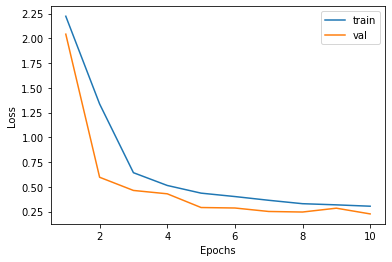

In [ ]:
from tqdm import tqdm
import torch.nn.functional as F
total_train_losses = []
total_val_losses = []

#ff=open('./{}/progress.txt'.format(save_folder),'w')

for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(train_dataloader)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        # *****START CODE
        optimizer.zero_grad()
        output = model(img_batch.float())
        loss=criterion(output, lbl_batch.long())
        loss.backward()
        optimizer.step()
        # *****END CODE

        train_losses.append(loss.item())
        confusion_matrix.add(output.data.squeeze(), lbl_batch.long())

        if i % 100 == 0:
            print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, epochs, i, len(train_dataloader),100.*i/len(train_dataloader), loss.item()))

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    train_loss_mean = np.mean(train_losses)
    total_train_losses.append(train_loss_mean)
    confusion_matrix.reset()

     ##VALIDATION##
    model.eval()
    val_losses = []

    for i, batch, in enumerate(tqdm(val_dataloader)):
        img_batch, lbl_batch = batch
   
        ##pass the images to the model and calculate the loss
        # *****START CODE
        outputs=model(img_batch.float())
        loss=criterion(outputs, lbl_batch.long())
        # *****END CODE

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
        val_losses.append(loss.item())

    print('Confusion Matrix:')
    print(confusion_matrix.conf)

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)
    total_val_losses.append(val_loss_mean)

    print('TRAIN_LOSS: ', '%.3f' % train_loss_mean, 'TRAIN_ACC: ', '%.3f' % train_acc)
    print('VAL_LOSS: ', '%.3f' % val_loss_mean, 'VAL_ACC: ', '%.3f' % val_acc)
    confusion_matrix.reset()

    write_results(save_folder, epoch, train_acc, val_acc, train_loss_mean, val_loss_mean)

    torch.save(model.state_dict(), save_folder + '/model_{}.pt'.format(epoch))

save_graph(total_train_losses, total_val_losses, epochs, save_folder)

## Test the trained model.

In [ ]:
test_images_file = 'drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/test_images.npy'
test_labels_file = 'drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/test_labels.npy'

##load the test images and the test labels
# *****START CODE
images = np.load(test_images_file)
labels = np.load(test_labels_file)
# *****END CODE

##define the model, load it and put it in evaluation mode
# *****START CODE
model = ConvNet(1,10)
model.load_state_dict(torch.load('drive/My Drive/Test taking and Learning/ESSEC-CentraleSupélec - M.Sc. DS&BA - Lecture Notes/1) Term 1 - ESSEC & Centrale/4) Foundations of Deep Learning/Lab 3/models/model_10.pt'))
model.eval()
# *****END CODE

confusion_matrix = tnt.meter.ConfusionMeter(10) 
confusion_matrix.reset()


for i in range(0, len(images)):
    ##rad each image, normalize it, convert it to a pytorch tensor of type float
    # *****START CODE
    img = images[i]
    label = torch.tensor([labels[i]])
    img = img/255.0 #normalization
    img = np.expand_dims(img,0)#reshape to (batchsize x channels x height x width)
    img = torch.from_numpy(img)
    # *****END CODE

    ##produce the model prediction
    # *****START CODE
    output = F.log_softmax(model(img.float()),1)
    # *****END CODE

    confusion_matrix.add(output.data, label.long())

print(confusion_matrix.conf)

[[ 99   0   0   0   0   0   0   0   1   0]
 [  0 108   2   0   0   2   0   0   0   0]
 [  1   0  88   1   1   0   1   0   2   0]
 [  2   0   5  80   0   1   1   3   1   2]
 [  1   0   0   0  75   0   1   0   0   6]
 [  1   0   1   0   0  78   1   0   2   2]
 [  1   0   0   0   0   1 113   0   0   0]
 [  0   0   0   0   0   0   0 108   0   3]
 [  2   0   2   2   0   1   2   0  99   1]
 [  0   0   0   3   2   0   0   3   0  88]]


Plot the first six testing images along with their true labels.

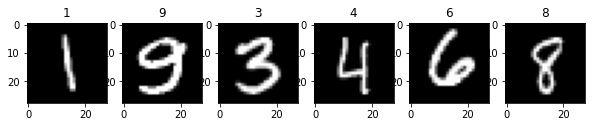

In [ ]:
##plot the testing images
# *****START CODE
plt.figure(figsize=(10,6))
n_images = 6
for i in range(n_images):
  plt.subplot(1, n_images, i+1)
  one_image = images[i, 0, :, :]
  one_title = labels[i]
  plt.imshow(one_image,cmap='gray')
  plt.title(one_title);
 # *****END CODE 

Print the model's predicted labels for the above images.

In [ ]:
##print the predicted labels for the above images
# *****START CODE
for i in range(n_images):
    img = images[i]
    img = img/255.0 #normalization
    img = np.expand_dims(img,0)#reshape to (batchsize x channels x height x width)
    img = torch.from_numpy(img)
    output = F.log_softmax(model(img.float()),1)
    output = torch.argmax(output)
    print(output)
# *****END CODE

tensor(1)
tensor(3)
tensor(3)
tensor(4)
tensor(6)
tensor(8)
